In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, r2_score, max_error, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hour.csv')

#df.isnull().sum()
#df.columns
#df.describe()
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [99]:
df2 = df.drop(['instant', 'dteday', 'yr', 'atemp', 'casual', 'registered'], axis = 1)

df2.season = df2.season.astype('category')
df2.mnth = df2.mnth.astype('category')
df2.holiday = df2.holiday.astype('category')
df2.weekday = df2.weekday.astype('category')
df2.workingday = df2.workingday.astype('category')
df2.weathersit = df2.weathersit.astype('category')

df2 = pd.get_dummies(df2)

In [100]:
df2.head()

,hr,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,mnth_1,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0.24,0.81,0.0,16,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
1,1,0.22,0.80,0.0,40,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
2,2,0.22,0.80,0.0,32,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
3,3,0.24,0.75,0.0,13,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
4,4,0.24,0.75,0.0,1,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0


In [101]:
X = df2.copy()
X = X.drop(['cnt'], axis = 1)
y = df2['cnt']
y = np.array(y)

In [102]:
# Scaling
#X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [103]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)

print('Mean_absolute_error: ', str(mean_absolute_error(y_test, model_dt_prediction)))
print('Mean_squared_error: ', str(mean_squared_error(y_test,model_dt_prediction)))
r2_dt = r2_score(y_test, model_dt_prediction)
print('The r2 value is: ' + str(r2_dt))

Mean_absolute_error:  63.03429228998849
Mean_squared_error:  10367.900115074799
The r2 value is: 0.6835528741681642


In [104]:
# K-Fold DecisionTree
# dt_plot = cross_val_score(tree.DecisionTreeClassifier(max_depth = 20), X, y, cv=10)
# print('Maximum: ', dt_plot.max())
# #cvs_dt = cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), X, y, cv=10).mean()
# print('Mean: ', dt_plot.mean())
# dt_plot = pd.Series(dt_plot)
# dt_plot.plot()

In [119]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)

print('Mean_absolute_error: ', str(mean_absolute_error(y_test, model_knn_prediction)))
print('Mean_squared_error: ', str(mean_squared_error(y_test,model_knn_prediction)))
r2_knn = r2_score(y_test, model_knn_prediction)
print('The r2 value is: ' + str(r2_knn))

Mean_absolute_error:  67.17514384349828
Mean_squared_error:  11431.92082853855
The r2 value is: 0.6510770311465308


In [115]:
model_svm = SVC(kernel='linear').fit(X_train, y_train)
model_svm_prediction = model_svm.predict(X_test)
print('Mean_absolute_error: ', str(mean_absolute_error(y_test, model_svm_prediction)))
print('Mean_squared_error: ', str(mean_squared_error(y_test,model_svm_prediction)))
r2_svm = r2_score(y_test, model_svm_prediction)
print('The r2 value is: ' + str(r2_svm))

Mean_absolute_error:  105.95834292289989
Mean_squared_error:  28862.153509781358
The r2 value is: 0.11907469959053985


In [107]:
model_svm2 = SVC(kernel='poly').fit(X_train, y_train)
model_svm2_prediction = model_svm2.predict(X_test)

print('Mean_absolute_error: ', str(mean_absolute_error(y_test, model_svm2_prediction)))
print('Mean_squared_error: ', str(mean_squared_error(y_test,model_svm2_prediction)))
r2_svm2 = r2_score(y_test, model_svm2_prediction)
print('The r2 value is: ' + str(r2_svm2))

Mean_absolute_error:  160.74016110471806
Mean_squared_error:  54599.74637514384
The r2 value is: -0.6664833399040531


In [108]:
#print(classification_report(y_test,model_svm2_prediction))

In [109]:
model_svm3 = SVC(kernel='rbf').fit(X_train, y_train)
model_svm3_prediction = model_svm3.predict(X_test)

print('Mean_absolute_error: ', str(mean_absolute_error(y_test, model_svm3_prediction)))
print('Mean_squared_error: ', str(mean_squared_error(y_test,model_svm3_prediction)))
r2_svm3 = r2_score(y_test, model_svm3_prediction)
print('The r2 value is: ' + str(r2_svm3))

Mean_absolute_error:  129.7392405063291
Mean_squared_error:  42709.69873417722
The r2 value is: -0.3035775093861879


In [123]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)

print('Mean_absolute_error: ', str(mean_absolute_error(y_test, model_rf_prediction)))
print('Mean_squared_error: ', str(mean_squared_error(y_test,model_rf_prediction)))
r2_rf = r2_score(y_test, model_rf_prediction)
print('The r2 value is: ' + str(r2_rf))

Mean_absolute_error:  76.6439585730725
Mean_squared_error:  15587.871116225546
The r2 value is: 0.5242298866870325


<AxesSubplot:>

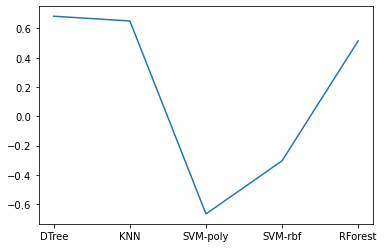

In [112]:
r2 = [r2_dt, r2_knn, r2_svm, r2_svm2, r2_svm3, r2_rf]
r2 = pd.Series(r2)

exploration_methods = ['DTree', 'KNN', 'SVM', 'SVM-poly', 'SVM-rbf', 'RForest']
plt.xticks(np.arange(6) , exploration_methods, rotation = '45')
r2.plot()

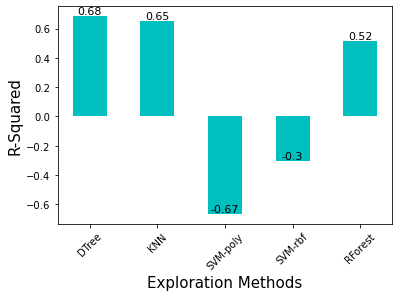

In [113]:
plt.bar(x=exploration_methods, height = r2, color = 'c', width = 0.5)
#plt.grid()
#plt.title('R-Squared')
plt.xlabel('Exploration Methods', fontsize=15)
plt.ylabel('R-Squared', fontsize=15)
plt.xticks(rotation=45)
#plt.ylim(0, 0.1)

for i in range(6):
  plt.text(
      x = i, 
      y = r2[i], 
      s = round(r2[i], 2), 
      horizontalalignment='center',
      verticalalignment='bottom',
      size = 11)

plt.show()